In [40]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.image import save_img

plt.rcParams['figure.figsize'] = (20.0, 20.0)

def load_img(image_path):
    img = image.load_img(image_path, target_size = (256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.
    return img

In [43]:
def style_transfer(content_path, style_path, generate_path):
    content = load_img(content_path)
    style = load_img(style_path)

    hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
    hub_module = hub.load(hub_handle)

    outputs = hub_module(tf.constant(content), tf.constant(style))
    generate = outputs[0]
    save_img(generate_path, generate[0])
    plt.subplot(1, 3, 1)
    plt.imshow(load_img(content_path)[0])
    plt.title('content')

    plt.subplot(1, 3, 2)
    plt.imshow(load_img(style_path)[0])
    plt.title('style')

    plt.subplot(1, 3, 3)
    plt.imshow(generate[0])
    plt.title('generate')

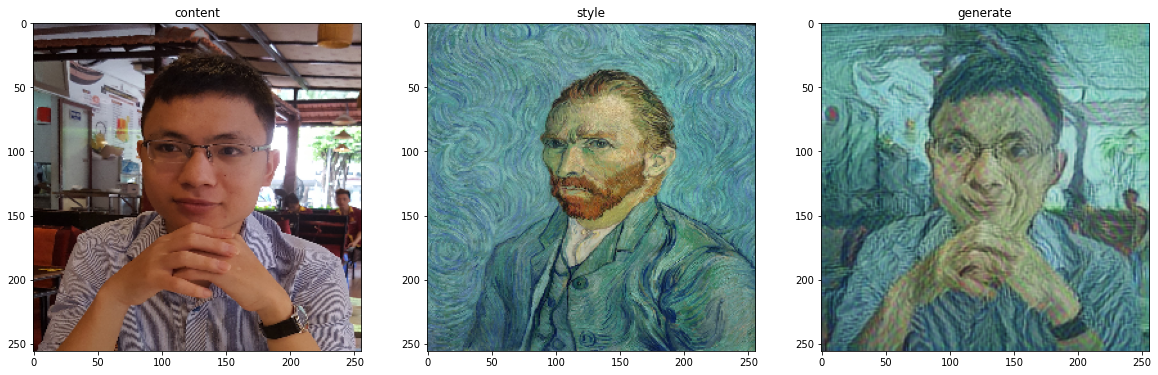

In [58]:
style_transfer('images/thien1.jpg', 'images/vangogh2.jpg', 'output/thien8.jpg')

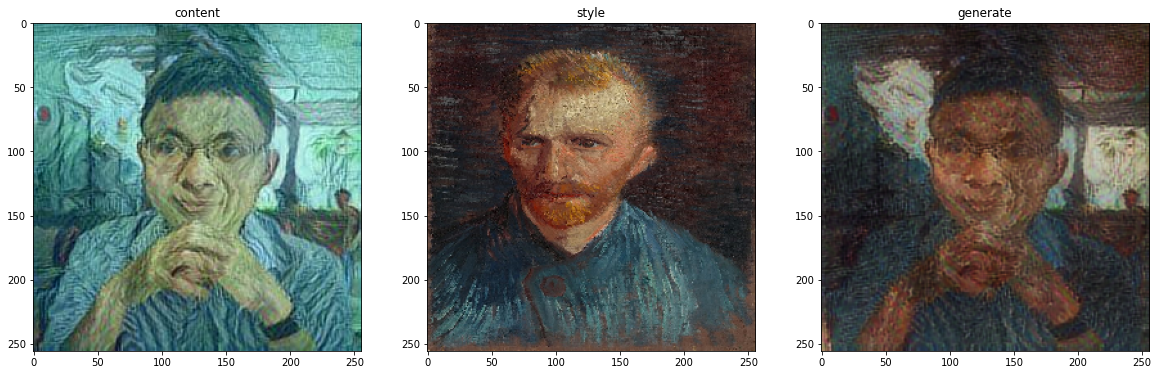

In [63]:
style_transfer('output/thien8.jpg', 'images/vangogh1.jpg', 'output/thien10.jpg')